## Penguins
> seaborn의 penguins.csv 로 머신러닝 - 데이터 전처리 학습하기
- Adelie, Gentoo 구분하기

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

df = sns.load_dataset('penguins')
df.head()
df.shape

(344, 7)

In [9]:
# 결측치가 포함된 행 제거
df_cleaned = df.dropna()
#  df.dropna(inplace=True)
# 라고 표현해도 됨. 

# 결측치를 각 평균으로 채워도 됨. 

# 결측치 제거 후 데이터 확인
print(df_cleaned.head())
df_cleaned.shape

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


(333, 7)

In [3]:
df_cleaned['species'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object>

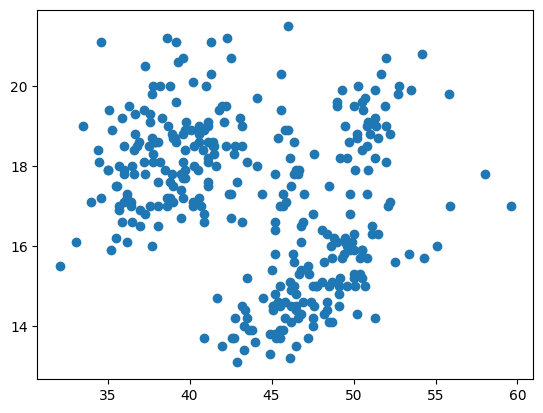

In [4]:
plt.scatter(df_cleaned['bill_length_mm'], df_cleaned['bill_depth_mm'])

In [5]:
cond = df_cleaned['species'].isin(['Adelie', 'Gentoo'])
df_cleaned.loc[cond, ['species']]

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie
...,...
338,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [6]:
sns.histplot(data=penguins)

NameError: name 'penguins' is not defined

In [7]:
sns.histplot(penguins, x="body_mass_g", hue="species", element="poly")

NameError: name 'penguins' is not defined

In [ ]:
sns.histplot(penguins, x="flipper_length_mm", hue="species", element="poly")

In [11]:
sns.histplot(penguins, x="flipper_length_mm", hue="species", element="step")

NameError: name 'penguins' is not defined

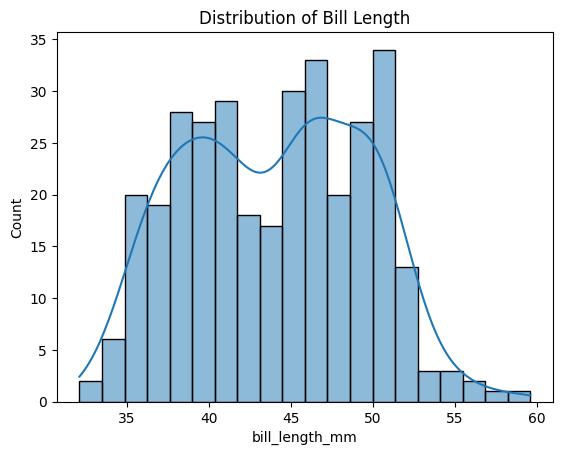

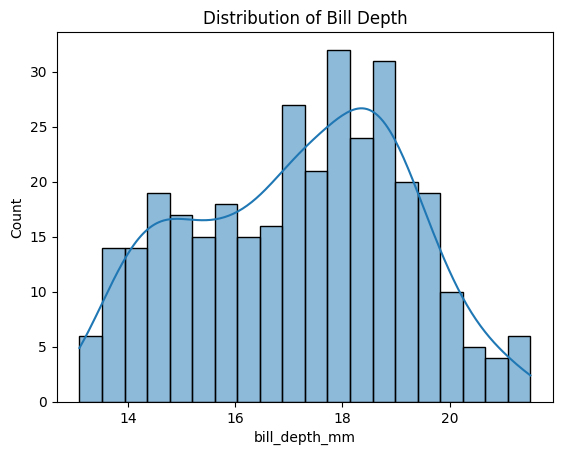

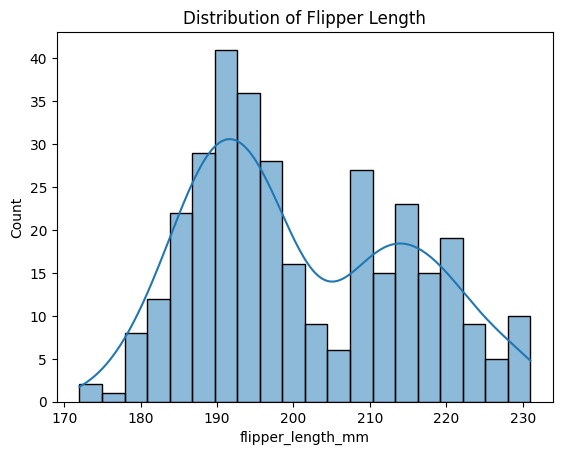

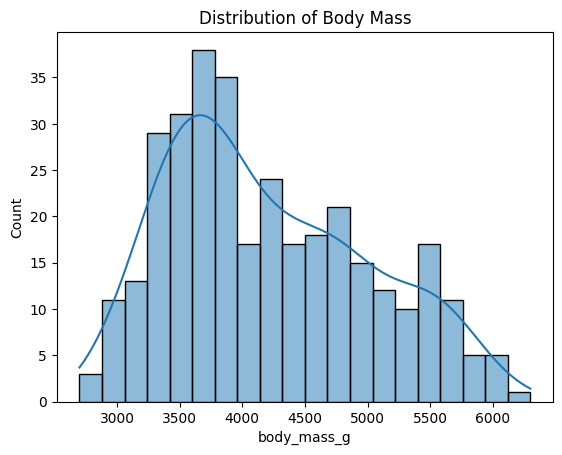

In [10]:
# Bill Length 분포
sns.histplot(df_cleaned['bill_length_mm'], kde=True, bins=20)
plt.title('Distribution of Bill Length')
plt.show()

# Bill Depth 분포
sns.histplot(df_cleaned['bill_depth_mm'], kde=True, bins=20)
plt.title('Distribution of Bill Depth')
plt.show()

# Flipper Length 분포
sns.histplot(df_cleaned['flipper_length_mm'], kde=True, bins=20)
plt.title('Distribution of Flipper Length')
plt.show()

# Body Mass 분포
sns.histplot(df_cleaned['body_mass_g'], kde=True, bins=20)
plt.title('Distribution of Body Mass')
plt.show()


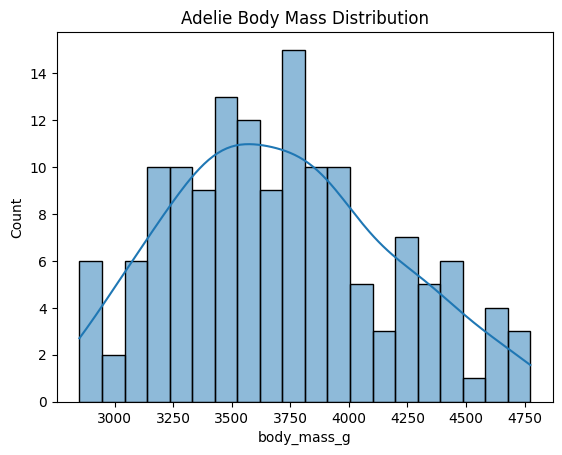

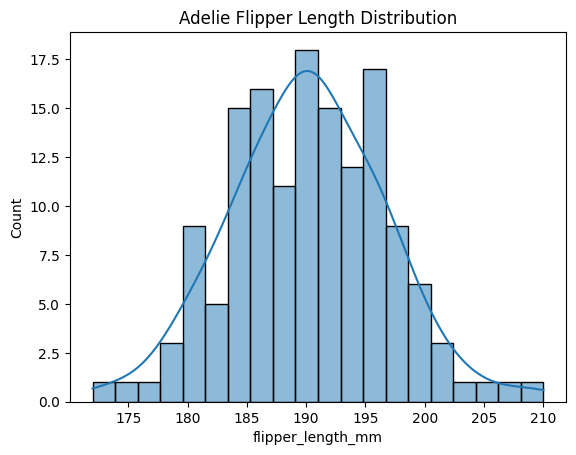

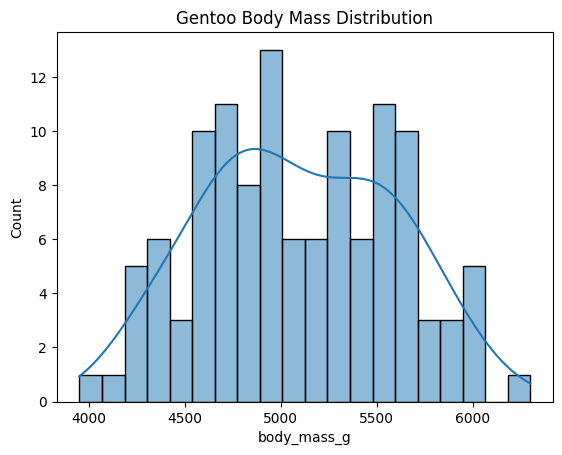

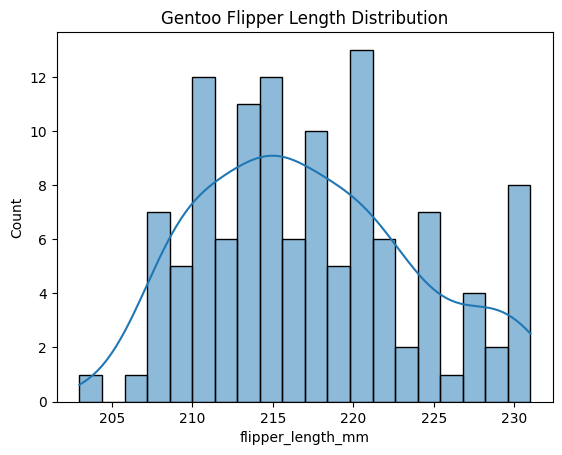

In [12]:
# Adelie 종의 데이터 필터링
adelie_data = df_cleaned[df_cleaned['species'] == 'Adelie']

# Gentoo 종의 데이터 필터링
gentoo_data = df_cleaned[df_cleaned['species'] == 'Gentoo']

# Adelie의 Body Mass 분포
sns.histplot(adelie_data['body_mass_g'], kde=True, bins=20)
plt.title('Adelie Body Mass Distribution')
plt.show()

# Adelie의 Flipper Length 분포
sns.histplot(adelie_data['flipper_length_mm'], kde=True, bins=20)
plt.title('Adelie Flipper Length Distribution')
plt.show()

# Gentoo의 Body Mass 분포
sns.histplot(gentoo_data['body_mass_g'], kde=True, bins=20)
plt.title('Gentoo Body Mass Distribution')
plt.show()

# Gentoo의 Flipper Length 분포
sns.histplot(gentoo_data['flipper_length_mm'], kde=True, bins=20)
plt.title('Gentoo Flipper Length Distribution')
plt.show()


In [ ]:
# Adelie와 Gentoo의 Body Mass 분포를 한번에 비교
sns.histplot(adelie_data['body_mass_g'], kde=True, bins=20, color='blue', label='Adelie', stat="density")
sns.histplot(gentoo_data['body_mass_g'], kde=True, bins=20, color='red', label='Gentoo', stat="density")

plt.title('Body Mass Distribution: Adelie vs Gentoo')
plt.legend()
plt.show()


# Adelie와 Gentoo의 Body Mass 분포를 한번에 비교
sns.histplot(adelie_data['bill_depth_mm'], kde=True, bins=20, color='blue', label='Adelie', stat="density")
sns.histplot(gentoo_data['bill_depth_mm'], kde=True, bins=20, color='red', label='Gentoo', stat="density")

plt.title('bill_depth_mm Distribution: Adelie vs Gentoo')
plt.legend()
plt.show()

# Adelie와 Gentoo의 Body Mass 분포를 한번에 비교
sns.histplot(adelie_data['flipper_length_mm'], kde=True, bins=20, color='blue', label='Adelie', stat="density")
sns.histplot(gentoo_data['flipper_length_mm'], kde=True, bins=20, color='red', label='Gentoo', stat="density")

plt.title('flipper_length Distribution: Adelie vs Gentoo')
plt.legend()
plt.show()

# Adelie와 Gentoo의 Body Mass 분포를 한번에 비교
sns.histplot(adelie_data['bill_length_mm'], kde=True, bins=20, color='blue', label='Adelie', stat="density")
sns.histplot(gentoo_data['bill_length_mm'], kde=True, bins=20, color='red', label='Gentoo', stat="density")

plt.title('bill_length Distribution: Adelie vs Gentoo')
plt.legend()
plt.show()



In [13]:
penguins_features = df_cleaned.loc[cond, ['bill_depth_mm', 'body_mass_g']]

penguins_data = penguins_features.values.tolist()

In [14]:
Adelie_count = df_cleaned.loc[df_cleaned['species'] == 'Adelie'].shape[0]
Adelie_count


146

In [15]:
Gentoo_count = df_cleaned.loc[df_cleaned['species'] == 'Gentoo'].shape[0]
Gentoo_count

119

In [18]:
import numpy as np

penguins_target = np.array([1] * Adelie_count + [0] * Gentoo_count)

# import random

# index = list(range(Adelie_count + Gentoo_count))
# random.shuffle(index)

# # index

# train_input = penguins_data[index[:70]]
# train_target = penguins_target[index[:70]]

In [19]:
import numpy as np
input_arr = np.array(penguins_data)
target_arr = np.array(penguins_target)

np.random
index = np.arange(265)
np.random.shuffle(index)
print(index)

[249 111  36 230 245  80 255  19 136  87  95  61  48  17 201 148  70 223
 202  38 133  32 100 126  44 165  20 198 206 158 184 239 251 105   5 207
 142 213 229 157 258  30 183 212  74 154 203  96  64   8 151 115 163  34
 171 197 125  49  75  84  16   1  58 119 193 231  63  43  11 217 186 234
 144 122 173 176 116   4 214 211 146  71 190 113 155 118 180 262 134  41
 112  92 168 237   2  31  47 177 250  54 121  15  93  67 182 174 179  99
 256 114 263  39  55 175 240  65 166  46 131 205 124 143 232 167  90 246
  60  23   7 189 108 103 135  62 259  12 104  26 221 170 110 194 222  89
   6  14 264  13 233  73   9 145 247 242 164  88   3 224 123  94  81 102
  82  72 228 178 261  45 149 153  78  42  29 150 101 260 139 235 117  98
 238 209 169  57 141 106 191  21  10 132 181 138 257  53 244  22 215 107
  18  28 199 128  27 243 156 195 200  37 161 172  56 152  50 252 130  97
 227  25 241 109 196 137 216 204 210  24 219 147 248 225  91 159 129 254
  85  51 253 188  68 120 185 160  52 208 220  83 12

In [20]:
train_input = input_arr[index[:150]]
train_target = target_arr[index[:150]]

test_target = target_arr[index[150:]]
test_input = input_arr[index[150:]]

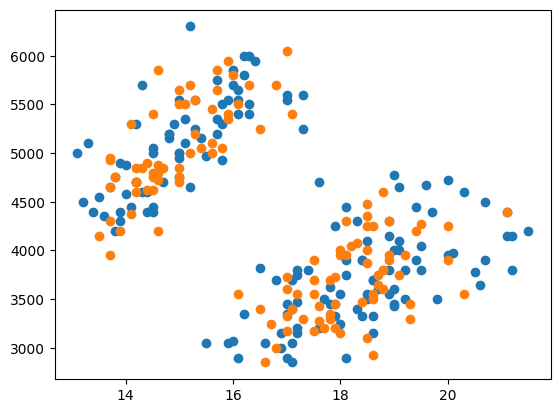

In [21]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [23]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [24]:
kn.score(test_input, test_target)

0.9391304347826087

---

#### 2번째 방법으로 데이터 전처리하기

In [ ]:
cond = df_cleaned['species'].isin(['Adelie', 'Gentoo'])
penguins_data = df_cleaned.loc[cond, ['bill_length_mm', 'body_mass_g']]
penguins_data.head()

In [ ]:
penguins_target = df_cleaned.loc[cond, ['species']]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = \
train_test_split(penguins_data, penguins_target)

In [28]:
mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std

#표준 점수화해서 학습시키기

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_input)

# 오류남 (표준점수화해서 하려고 했는데 - 강사님 설명 따라, 아래가 내가 원래 표준점수화 안하고 한 것)

KNeighborsClassifier()

In [ ]:
test_target

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

# kn.fit(train_input, train_target)
#train target이 데이터프레임이므로 에러가 나, 내가 가져올 index를 지정해서 적어주자.
kn.fit(train_input, train_target['species'])

In [ ]:
kn.score(test_input, test_target['species'])